In [225]:
import numpy as np

In [238]:
d = 50
a = np.zeros((d, d))

x = np.linspace(0, d/10, d)

In [239]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [240]:
sigma = 1
l = 1

for i in range(d):
    for j in range(d):
        a[i][j] = np.exp(-1 * (x[i] - x[j]) ** 2 / (2 * l**2))
        
        
a += 1e-8 * np.eye(d)

In [241]:
a

array([[1.00000001e+00, 9.94807364e-01, 9.79390679e-01, ...,
        1.01258754e-05, 6.17499749e-06, 3.72665317e-06],
       [9.94807364e-01, 1.00000001e+00, 9.94807364e-01, ...,
        1.64326026e-05, 1.01258754e-05, 6.17499749e-06],
       [9.79390679e-01, 9.94807364e-01, 1.00000001e+00, ...,
        2.63911377e-05, 1.64326026e-05, 1.01258754e-05],
       ...,
       [1.01258754e-05, 1.64326026e-05, 2.63911377e-05, ...,
        1.00000001e+00, 9.94807364e-01, 9.79390679e-01],
       [6.17499749e-06, 1.01258754e-05, 1.64326026e-05, ...,
        9.94807364e-01, 1.00000001e+00, 9.94807364e-01],
       [3.72665317e-06, 6.17499749e-06, 1.01258754e-05, ...,
        9.79390679e-01, 9.94807364e-01, 1.00000001e+00]])

In [242]:
val, vec = np.linalg.eigh(a)

In [243]:
val > 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [244]:
vec

array([[ 0.        , -0.00953173,  0.        , ...,  0.19003574,
         0.13123634, -0.06697572],
       [ 0.00643182,  0.06723288, -0.00407325, ...,  0.19438083,
         0.1404201 , -0.07348412],
       [-0.05083556, -0.19101868,  0.02921744, ...,  0.19622108,
         0.14904623, -0.08015165],
       ...,
       [-0.07832357,  0.10290815, -0.11054524, ...,  0.19622108,
        -0.14904623, -0.08015165],
       [ 0.02711272, -0.04275822,  0.04482222, ...,  0.19438083,
        -0.1404201 , -0.07348412],
       [-0.00383502,  0.00646814, -0.00651458, ...,  0.19003574,
        -0.13123634, -0.06697572]])

In [245]:
(vec @ np.diagflat(val) @ vec.T - a).max() < 1e-10

True

In [246]:
l = np.sqrt(np.diagflat(val))

In [247]:
sample = np.random.normal(size=(d))

In [248]:
vec @ l @ sample

array([-0.56165831, -0.61576442, -0.67149157, -0.73219374, -0.80015706,
       -0.87785254, -0.96530257, -1.06203746, -1.16661201, -1.27576438,
       -1.38590059, -1.4927389 , -1.59167806, -1.67905466, -1.75076517,
       -1.80406547, -1.83702139, -1.84867344, -1.83852401, -1.80734472,
       -1.75674567, -1.68763221, -1.6017761 , -1.50116314, -1.38726709,
       -1.26180391, -1.12610998, -0.98162297, -0.8297691 , -0.67129786,
       -0.50719698, -0.33973342, -0.16927773,  0.00265347,  0.17362041,
        0.34230162,  0.50568097,  0.6617052 ,  0.80727921,  0.93901677,
        1.05463684,  1.15118317,  1.22745655,  1.28225613,  1.31551695,
        1.32788996,  1.32096504,  1.29731686,  1.25876463,  1.20791975])

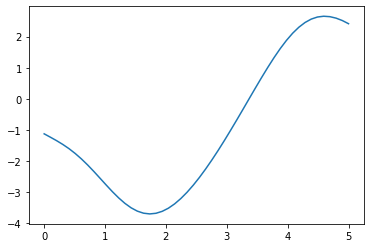

In [251]:
from matplotlib import pyplot as plt
plt.plot(x, vec @ (2*l) @ sample)

In [268]:
import torch
x = torch.randn(2, 2)

In [269]:
x

tensor([[-1.4648,  1.6969],
        [-0.5662,  1.3133]])

In [271]:
a = x[0]
x[0, 0] = 9.

In [272]:
a

tensor([9.0000, 1.6969])

In [263]:
v, i = torch.max(x, dim=0)

In [264]:
x[i]

tensor(1.0232)